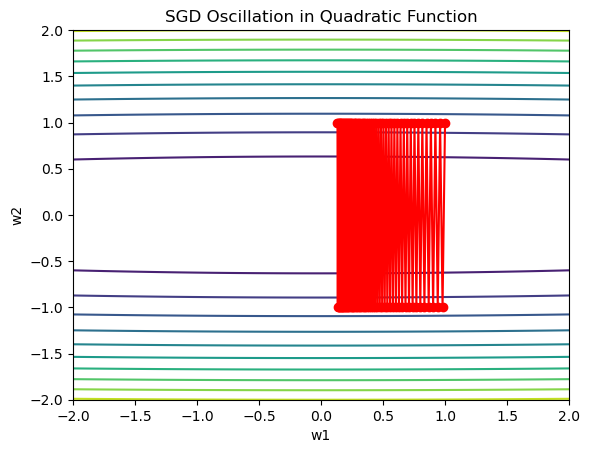

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定义二次函数
def quadratic_function(w):
    a = 1
    b = 100  # 使得在w2方向上梯度变化更剧烈
    return a * w[0] ** 2 + b * w[1] ** 2

# 计算梯度
def gradient(w):
    a = 1
    b = 100
    return np.array([2 * a * w[0], 2 * b * w[1]])

# 随机梯度下降
def sgd(learning_rate, num_iterations):
    w = np.array([1.0, 1.0])  # 初始参数
    w_history = [w.copy()]
    for _ in range(num_iterations):
        grad = gradient(w)
        w = w - learning_rate * grad
        w_history.append(w.copy())
    return np.array(w_history)

# 设置参数
learning_rate = 0.01
num_iterations = 100

# 运行SGD
w_history = sgd(learning_rate, num_iterations)

# 绘制等高线图和SGD的更新路径
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([quadratic_function([xi, yi]) for xi, yi in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

plt.contour(X, Y, Z, levels=10)
plt.plot(w_history[:, 0], w_history[:, 1], 'ro-')
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('SGD Oscillation in Quadratic Function')
plt.show()

在上述二维二次函数$f(w_1, w_2) = a*w_1^2 + b*w_2^2$（$a = 1$，$b = 100$）的案例中，参数来回震荡以及改变学习率后收敛情况变化的原因如下：

### 1. 函数特性导致的梯度差异
对于函数$f(w_1, w_2) = a*w_1^2 + b*w_2^2$，其梯度为$\nabla f(w_1, w_2)=\begin{bmatrix}2aw_1 \\ 2bw_2\end{bmatrix}$。由于$b = 100$远大于$a = 1$，这意味着在$w_2$方向上梯度的变化幅度比$w_1$方向大得多。

例如，当$w_1 = 1$，$w_2 = 1$时，梯度$\nabla f(1, 1)=\begin{bmatrix}2\times1\times1 \\ 2\times100\times1\end{bmatrix}=\begin{bmatrix}2 \\ 200\end{bmatrix}$。可以看到，$w_2$方向的梯度值是$w_1$方向的100倍。在这种情况下，随机梯度下降每次更新参数时，$w_2$的更新量会相对$w_1$大很多。

### 2. 学习率较小时的震荡原因
随机梯度下降的更新公式为$w_i = w_i - \alpha * \frac{\partial f}{\partial w_i}$（$i = 1, 2$）。当学习率$\alpha$较小时（如$\alpha = 0.01$），虽然每次$w_2$的更新量在绝对值上相对较小，但由于$w_2$方向上梯度变化剧烈，在每次迭代中，$w_2$会在较大梯度的作用下，在函数最小值点（$w_1 = 0$，$w_2 = 0$）附近的两侧来回变动。

而$w_1$方向上梯度变化相对平缓，更新相对稳定。所以整体上看，参数更新路径就会在$w_2$方向上表现出明显的震荡，在等高线图上呈现出在$w_2$方向上反复穿越等高线的情况。

### 3. 学习率改大后收敛的原因
当稍微增大学习率时，虽然$w_2$方向上的更新量进一步增大，但由于在较大学习率下，算法在每次迭代中能够更快地跨越函数的“山谷”区域。在之前较小学习率下，$w_2$方向的震荡使得算法在“山谷”两侧反复徘徊，而较大学习率使得每次更新能够更有力地朝着最小值点前进，有可能直接越过震荡区域，从而更快地收敛到最小值点。

然而，这并不意味着学习率越大越好。如果学习率过大，可能会导致更新量过大，使得参数直接跳过最小值点，甚至在整个参数空间中发散，无法收敛到任何有意义的解。

总之，案例中参数震荡是由函数本身在不同方向的梯度差异以及学习率大小共同作用导致的，调整学习率会改变参数更新的行为，影响算法是否震荡以及收敛的速度和效果。 